# The Battle of Neighborhoods - Toronto, ON Canada

## Finidng the best neighborhood to live in Toronto

# 1: Introduction

### Background

In an effort to address its aging population and declining workforce, Canada has implemented a number of immigration programs to attract and invite immigrants to live, raise families, work and establish businesses in the country.

According to Statista (an online business data platform that hosts insights and facts across 170 industries in over 150 countries), between 2000 and 2020, over 8 million foreign nationals from various countries across the world have immigrated to Canada. Despite the COVID-19 pandemic that began in 2019 and international travel restrictions that was in full effect 2020, a total of 284,387 people immigrated to the country between July 1, 2019 and June 30, 2020; with Ontario receiving 50% of immigrants and Toronto being the most attractive city for the immigrants. This shows that Toronto has become the top destination choice for Canadian immigrants (myself included). 

The decision to migrate to another country involves a number of big decisions to make - the first being where to live in. Some of the factors that are usually considered when deciding on the place to live are listed below:


1.  Crime Rate/neighborhood safety
2.  Unemployment Rate
3.  Affordable housing
4.  Availability of good schools
5.  Ease of commuting such as public transit system (buses, trains, ride-sharing), and road networks
6.  Access to grocery stores, markets, gas stations, police stations
7.  Availability of recreational/leisure spots such as parks, restaurants, coffee shops, fitness centers, cinemas, museums, historic landmarks

### Problem Statement

Unfortunately, a blanket online search for the ideal place to live in Toronto does not equip the information seeker with adequate comparative numeric data to make a well-informed decision. Therefore, this objective of this study is to help people (like me) to decide on the ideal neighborhood to settle in by considering some of the factors stated above.

### Target Audience

The target audience for this study are:

 -   New and prospective immigrants to Toronto, Canada
 -   People who intend to move to Toronto from other provinces in Canada
 -   People who intend to move to Toronto from other areas within Ontario

# 2: Data Requirements

#### 2.1: Data

For the purpose of this study, information on Toronto's neighborhoods such as postcodes, geolocation, recreational/leisure spots and crime data will be sourced from public websites and open data sources. The data required and corresponding sources are listed below:


 - Toronto's Boroughs and Postcodes from Wikipedia : "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

 - Toronto's Geospatial coordinates : "https://cocl.us/Geospatial_data"

 - Toronto's available amenities and recreational/leisure spots from Foursquare API - an API that provides location based experiences with diverse information about venues, users, photos, and check-ins. The developer console of the app will be used to access the required information. :  "https://developer.foursquare.com/" 


#### 2.2: Libraries and Tools

The following open-source libraries and tools that are compatible with Python programming application will be used to analyse the data for this study.

 - BeautifulSoup: A web scraping tool to help pull specific contents from a webpage by cleaning out the HTML/XML markup and saving the required data.
 - Pandas: A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
 - Numpy: A Python library used for working with arrays.
 - Scikitlearn: A robust library used for  for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction in Python.
 - JSON: A Python library to import and process JSON strings to readable objects in Python.
 - Matplotlib : A comprehensive library for creating static, animated, and interactive visualizations in Python.
 - Folium: A Python library used to visualize geospatial data.
 - Geocoder: A geocoding library used to transform a descriptive location into a geographical coordinate.
 

#### 2.3: Data Cleansing and Feature Selection

The data cleansing and feature selection stage of this study will follow the stepwise process outlined below:

**Step 1:** The required Python packages and libraries will be downloaded and installed for use. 

**Step 2:** Toronto's borough and postcode information will be scrapped from the Wikipedia site using BeautifulSoup; and transformed into a dataframe consisting of three columns namely: **'Postcode'**, **'Borough'** and **'Neighborhood'**. Neighborhoods that don't have assigned boroughs will be removed from the data.

**Step 3:** Toronto's geospatial coordinates will be downloaded as a csv file from the geospatial data link. This will be merged with the borough and postcode data to produce a new dataframe - **df2**.

**Step 4:** A set of boroughs of interest will be filtered from df2; merged with Toronto's available amenities and recreational/leisure spots which will be retrieved from **Foursquare location data** using Foursquare API to produce a third dataframe - **Toronto_df** - containing a list of postcodes, boroughs, neighborhoods, geospatial coordinates and all the amenities available in each location. 

**Step 5:** A cluster analysis will be done on Toronto_df to group the neighborhoods based on their available amenities. This analysis will be carried out using K-means algorithm. The Elbow method will be used to determine the optimal number of clusters (k) to be used. The output of the clusters will be visualized on a map using Folium.

Inferences will be made from the result of the cluster analysis and conclusions on the best neighborhood to live in will be drawn from the inferences made. 

**It is important to note, however, that the conclusions drawn from this study is relative as each individual's preferences - particularly for available amenities - will reflect in their final choice of neighborhood to live in.** 

# 3: Methodology

## 3.1: Analytical Approach

The analytical approach to be used for this study is the K-means clustering technique. k-Means is a machine learning algorithm that is used to group data points based on similar features or characteristics. It is an efficient algorithm that can be deployed to medium or large-sized databases to quickly generate insights from data.

In this study, the k-Means approach will serve to group neighborhoods into clusters; and a closer look at each cluster will show the similarities and differences between these neighborhoods. 

## 3.2: Data Analysis

## Data Analysis Part 1: Data Cleansing, Feature Selection and Exploratory Analysis with Folium

### 1.1: Install Required Packages

In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install yellowbrick

import requests # library to handle requests
import re
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import seaborn as sns
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html
import lxml.html as lh
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup # for scrapping webpage contents
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


###  1.2: Scrape data from the source url - Wikipedia; wrangle, clean and read it into a pandas dataframe.

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
soup = BeautifulSoup(requests.get(url).content, "html.parser")

data = []
for p in soup.select("td > p"):
    text = p.get_text(strip=True, separator=" ")
    post_code, borough, neighbourhood = re.search(
        r"^(M[^\s]+)\s*([^(]+)(?:\s*(.*))?", text
    ).groups()
    borough = borough.strip()
    neighbourhood = (neighbourhood or "Not Assigned").strip("() ")
    neighbourhood = neighbourhood.replace("(", "/").replace(")", "/")

    data.append((post_code, borough, neighbourhood))

df = pd.DataFrame(data, columns=["Postcode", "Borough", "Neighborhood"])
print(df)

    Postcode           Borough  \
0        M1A      Not assigned   
1        M2A      Not assigned   
2        M3A        North York   
3        M4A        North York   
4        M5A  Downtown Toronto   
..       ...               ...   
175      M5Z      Not assigned   
176      M6Z      Not assigned   
177      M7Z      Not assigned   
178      M8Z         Etobicoke   
179      M9Z      Not assigned   

                                          Neighborhood  
0                                         Not Assigned  
1                                         Not Assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                           Regent Park / Harbourfront  
..                                                 ...  
175                                       Not Assigned  
176                                       Not Assigned  
177                                       Not Assigned  
178  Mimico NW / The 

In [3]:
df.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not Assigned
1,M2A,Not assigned,Not Assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


#### Remove 'Not assigned' boroughs

In [4]:
df.drop(df[df['Borough'] == 'Not assigned'].index, inplace=True)
df.index = range(len(df))
df

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business reply mail Processing Ce...,Enclave of M4L
101,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...


In [5]:
# Print the number of rows and columns in the dataframe

df.shape

(103, 3)

### 1.3: Add Geospatial Coordinates to Data

#### Install required packages

In [6]:
!pip install geocoder

In [7]:
import geocoder
from geopy.geocoders import Nominatim # to convert an address into latitude and longitude values

#### Run a while loop for each postal code to ontain the coordinates.

In [8]:
#get latitude and longitude using geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.arcgis('{}, Toronto, Ontario'.format('Postal Code'))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

print(latitude,longitude )

43.648690000000045 -79.38543999999996


####  Alternatively, use the Geospatial dataset to get the coordinates

In [9]:
#read geospatial data file

geos_data = pd.read_csv('https://cocl.us/Geospatial_data')
geos_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merge/append geospatial data with Toronto neighborhoods data

In [10]:
geos_data.rename(columns={'Postal Code':'Postcode'},inplace=True)
df2 = pd.merge(df,geos_data,on='Postcode')
df2.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [11]:
df2.shape

(103, 5)

### 1.4: Extract the Boroughs of Interest and Merge with Foursquare Location Data

### Extract the Boroughs of Interest

In [12]:
# Retreive a list of unique boroughs

df2['Borough'].unique()

array(['North York', 'Downtown Toronto', "Queen's Park", 'Etobicoke',
       'Scarborough', 'East York', 'York', 'East Toronto', 'West Toronto',
       'East York East Toronto', 'Central Toronto',
       'Mississauga Canada Post Gateway Processing Centre',
       'Downtown Toronto Stn A PO Boxes 25 The Esplanade',
       'Etobicoke Northwest',
       'East Toronto Business reply mail Processing Centre 969 Eastern'],
      dtype=object)

#### Select top boroughs of interest from the list. In this case, the boroughs of interest are the ones containing 'Toronto' in their description. There are two ways to do this: One way is to uniquely define each borough by its exact name. Another way is to pass a line of code that searches and returns all boroughs with 'Toronto' in its description.

**Option 2 will be used in this study because it is faster and will ensure that all boroughs with 'Toronto' in its description will be fetched.**

In [13]:
#Option 1: uniquely define each borough by its exact name

boroughs_df = df2[(df2['Borough']=='Central Toronto') | (df2['Borough']=='West Toronto') | (df2['Borough']=='East York East Toronto') | (df2['Borough']=='Downtown Toronto')].reset_index(drop=True)
print(boroughs_df.shape)
boroughs_df.head()

(33, 5)


,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


In [14]:
#Option 2: pass a line of code that searches and returns all boroughs with 'Toronto' in its description

boroughs_df = df2[df2['Borough'].str.contains('Toronto',regex=False)]
boroughs_df

,Postcode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568
31,M6H,West Toronto,Dufferin / Dovercourt Village,43.669005,-79.442259
35,M4J,East York East Toronto,The Danforth East,43.685347,-79.338106


In [15]:
# Reduce the length of the neighborhoods with more than one name.

boroughs_df['Neighborhood'] = boroughs_df['Neighborhood'].apply(lambda x: x.split('/')[0])
boroughs_df.head()

<ipython-input-15-aca4353faef6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boroughs_df['Neighborhood'] = boroughs_df['Neighborhood'].apply(lambda x: x.split('/')[0])


,Postcode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


#### Visualize the new dataframe on map with Folium

In [16]:
# First, use Kmeans to cluster the neighborhoods using a random k number

k=5
boroughs_cluster = boroughs_df.drop(['Postcode','Borough','Neighborhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(boroughs_cluster)
kmeans.labels_
boroughs_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [17]:
boroughs_df

,Cluster Labels,Postcode,Borough,Neighborhood,Latitude,Longitude
2,0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
9,0,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,3,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,2,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,0,M5H,Downtown Toronto,Richmond,43.650571,-79.384568
31,4,M6H,West Toronto,Dufferin,43.669005,-79.442259
35,3,M4J,East York East Toronto,The Danforth East,43.685347,-79.338106


In [18]:
# Second, Create map

map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters created in the previous step. This step can be skipped if you don't want the neighbourhoods color-coded.
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighborhood, cluster in zip(boroughs_df['Latitude'], boroughs_df['Longitude'], boroughs_df['Neighborhood'], boroughs_df['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Narrow Down the data to Downtown Toronto and create a map for Downtown Toronto only

In [19]:
# Create a dataframe for Downtown Toronto only. You can also use "DowntownToronto = boroughs_df[boroughs_df['Borough'] == 'Downtown Toronto']" but it won't re-arrange the row numbers

Downtown_data = boroughs_df[boroughs_df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
Downtown_data.head()

,Cluster Labels,Postcode,Borough,Neighborhood,Latitude,Longitude
0,0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
1,0,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937
2,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
4,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


In [20]:
# Obtain coordinates for Downtown Toronto using geolocator

address = 'Downtown Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6563221, -79.3809161.


In [21]:
# Visualize Downtown Toronto with Folium to create a map of Downtown Toronto using latitude and longitude values

map_DowntownToronto = folium.Map(location=[43.6563221, -79.3809161], zoom_start=13)

# add markers to map
for lat, lng, label in zip(Downtown_data['Latitude'], Downtown_data['Longitude'], Downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DowntownToronto)  
    
map_DowntownToronto

### Merge with Foursquare Location Data

##### First remove the cluster column from  the dataframe

In [22]:
df3 = Downtown_data.drop(['Cluster Labels'], axis = 1)
df3.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


##### Define Foursquare credentials

In [23]:
CLIENT_ID = 'SCG03Z2ZDA23YVAV2LCLQMXE1MSLV4IBSZ4VGXFD0R50ZKAL' # Foursquare ID
CLIENT_SECRET = 'EDY3YFRUJPANY44DWIYKBM2SCQQQQY1Q1QUE1JVUBTYGTMPI' # Foursquare Secret
VERSION = '20210816' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: SCG03Z2ZDA23YVAV2LCLQMXE1MSLV4IBSZ4VGXFD0R50ZKAL
CLIENT_SECRET: EDY3YFRUJPANY44DWIYKBM2SCQQQQY1Q1QUE1JVUBTYGTMPI


##### Explore one of the neighborhoods in the dataframe: Central Bay Street

In [24]:
# Obtain neighborhood name

df3.loc[4, 'Neighborhood']

'Central Bay Street'

In [25]:
# Obtain Central Bay Street's Coordinates

neighborhood_latitude = df3.loc[4, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df3.loc[4, 'Longitude'] # neighborhood longitude value

neighborhood_name = df3.loc[4, 'Neighborhood']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Central Bay Street are 43.6579524, -79.3873826.


In [26]:
# Obtain top 100 venues in Central Bay Street within a 500-meter radius.

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SCG03Z2ZDA23YVAV2LCLQMXE1MSLV4IBSZ4VGXFD0R50ZKAL&client_secret=EDY3YFRUJPANY44DWIYKBM2SCQQQQY1Q1QUE1JVUBTYGTMPI&v=20210816&ll=43.6579524,-79.3873826&radius=500&limit=100'

In [27]:
# Send a GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '61316e8fbc00491b89275cda'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 69,
  'suggestedBounds': {'ne': {'lat': 43.6624524045, 'lng': -79.38117421839567},
   'sw': {'lat': 43.6534523955, 'lng': -79.39359098160432}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '537d4d6d498ec171ba22e7fe',
       'name': "Jimmy's Coffee",
       'location': {'address': '82 Gerrard Street W',
        'crossStreet': 'Gerrard & LaPlante',
        'lat': 43.65842123574496,
        'lng': -79.38561319551111,
        'label

In [28]:
#Create a 'get_category' function to extract the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
            
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
# Clean the JSON and structure it into a pandas dataframe

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.address']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-29-bca23211d12d>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng,address
0,Jimmy's Coffee,Coffee Shop,43.658421,-79.385613,82 Gerrard Street W
1,Tim Hortons,Coffee Shop,43.658570,-79.385123,70 Gerrard St West
2,Hailed Coffee,Coffee Shop,43.658833,-79.383684,44 Gerrard St W
3,The Queen and Beaver Public House,Gastropub,43.657472,-79.383524,35 Elm St.
4,Mercatto,Italian Restaurant,43.660391,-79.387664,101 College St


In [30]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

69 venues were returned by Foursquare.


##### Create a Dataframe containing the list of venues and their corresponding coordinates.

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng, in zip(names, latitudes, longitudes):
        print(name)
        
        #api request
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
        
        #get request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        #return only the info we want
        venues_list.append([(name, lat, lng,
                           v['venue']['name'],
                           v['venue']['location']['lat'],
                           v['venue']['location']['lng'],
                           v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood'],['Neighborhood Latitude'],['Neighborhood Longitude'],['Venue'],['Venue Latitude'],['Venue Longitude'],['Venue Category']
            
    return(nearby_venues)

##### Obtain a list of Downtown venues

In [32]:
Downtown_venues = getNearbyVenues(names=Downtown_data['Neighborhood'], latitudes=Downtown_data['Latitude'], longitudes=Downtown_data['Longitude'])

Regent Park 
Garden District , Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond 
Harbourfront East 
Toronto Dominion Centre 
Commerce Court 
University of Toronto 
Kensington Market 
CN Tower 
Rosedale
St. James Town 
First Canadian Place 
Church and Wellesley


In [33]:
Downtown_venues.head()

,"(Neighborhood,)","(Neighborhood Latitude,)","(Neighborhood Longitude,)","(Venue,)","(Venue Latitude,)","(Venue Longitude,)","(Venue Category,)"
0,Regent Park,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Regent Park,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Regent Park,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Regent Park,43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
4,Regent Park,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


##### Format the column headers appropriately

In [34]:
list(Downtown_venues.columns.values)

[('Neighborhood',),
 ('Neighborhood Latitude',),
 ('Neighborhood Longitude',),
 ('Venue',),
 ('Venue Latitude',),
 ('Venue Longitude',),
 ('Venue Category',)]

In [35]:
Downtown_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
Downtown_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Regent Park,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Regent Park,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Regent Park,43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
4,Regent Park,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [36]:
Downtown_venues.shape

(1128, 7)

##### To view venues in our exploratory area of interest only : Central Bay Street

In [37]:
CentralBay_venues = Downtown_venues[Downtown_venues['Neighborhood'] == 'Central Bay Street']
CentralBay_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
297,Central Bay Street,43.657952,-79.387383,Jimmy's Coffee,43.658421,-79.385613,Coffee Shop
298,Central Bay Street,43.657952,-79.387383,Tim Hortons,43.658570,-79.385123,Coffee Shop
299,Central Bay Street,43.657952,-79.387383,Hailed Coffee,43.658833,-79.383684,Coffee Shop
300,Central Bay Street,43.657952,-79.387383,The Queen and Beaver Public House,43.657472,-79.383524,Gastropub
301,Central Bay Street,43.657952,-79.387383,Mercatto,43.660391,-79.387664,Italian Restaurant
...,...,...,...,...,...,...,...
361,Central Bay Street,43.657952,-79.387383,Second Cup,43.660722,-79.386308,Coffee Shop
362,Central Bay Street,43.657952,-79.387383,Teriyaki Experience,43.659884,-79.387879,Restaurant
363,Central Bay Street,43.657952,-79.387383,Mo'Ramyun,43.656148,-79.392282,Korean Restaurant
364,Central Bay Street,43.657952,-79.387383,D Spot,43.661970,-79.386240,Dessert Shop


In [38]:
#To view number of unique venue categories in Central Bay Street
print('There are {} unique categories.'.format(len(CentralBay_venues['Venue Category'].unique())))

There are 45 unique categories.


## Data Analysis Part 2: Analyse Neighborhoods in the Boroughs of Interest - Toronto

### 2.1: Create a Toronto dataframe to be used for Cluster Analysis

#### 2.1.1: Recall the dataframe containing only boroughs containing 'Toronto' in its description

In [39]:
boroughs_df.head()

,Cluster Labels,Postcode,Borough,Neighborhood,Latitude,Longitude
2,0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
9,0,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,3,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


#### 2.1.2 Remove the previous cluster labels from the dataframe

In [40]:
boroughs_df=boroughs_df.drop(['Cluster Labels'], axis = 1)
print(boroughs_df.shape)
boroughs_df.head()

(39, 5)


,Postcode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


#### 2.1.3: Obtain a list of venues for Toronto boroughs and merge with Toronto dataframe - boroughs_df

In [41]:
latitudes = boroughs_df['Latitude']
longitudes = boroughs_df['Longitude']

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng, in zip(names, latitudes, longitudes):
        print(name)
        #api request
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
        #get request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        #return only the info we want
        venues_list.append([(name, lat, lng,
                           v['venue']['name'],
                           v['venue']['location']['lat'],
                           v['venue']['location']['lng'],
                           v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood'],['Neighborhood Latitude'],['Neighborhood Longitude'],['Venue'],['Venue Latitude'],['Venue Longitude'],['Venue Category']
            
    return(nearby_venues)

In [42]:
Toronto_df = getNearbyVenues(names=boroughs_df['Neighborhood'], latitudes=boroughs_df['Latitude'], longitudes=boroughs_df['Longitude'])

Regent Park 
Garden District , Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond 
Dufferin 
The Danforth East
Harbourfront East 
Little Portugal 
The Danforth West 
Toronto Dominion Centre 
Brockton 
India Bazaar 
Commerce Court 
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park 
North Toronto West
The Annex 
Parkdale 
Davisville
University of Toronto 
Runnymede 
Moore Park 
Kensington Market 
Summerhill West 
CN Tower 
Rosedale
Enclave of M5E
St. James Town 
First Canadian Place 
Church and Wellesley
Enclave of M4L


In [43]:
print(Toronto_df.shape)
Toronto_df

(1609, 7)


,"(Neighborhood,)","(Neighborhood Latitude,)","(Neighborhood Longitude,)","(Venue,)","(Venue Latitude,)","(Venue Longitude,)","(Venue Category,)"
0,Regent Park,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Regent Park,43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Regent Park,43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Regent Park,43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
4,Regent Park,43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
...,...,...,...,...,...,...,...
1604,Enclave of M4L,43.662744,-79.321558,The Ten Spot,43.664815,-79.324213,Spa
1605,Enclave of M4L,43.662744,-79.321558,Olliffe On Queen,43.664503,-79.324768,Butcher
1606,Enclave of M4L,43.662744,-79.321558,Greenwood Cigar & Variety,43.664538,-79.325379,Smoke Shop
1607,Enclave of M4L,43.662744,-79.321558,ONE Academy,43.662253,-79.326911,Gym / Fitness Center


In [44]:
# Format the column headers appropriately

Toronto_df.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
Toronto_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Regent Park,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Regent Park,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Regent Park,43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
4,Regent Park,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [45]:
#To view number of unique venue categories in Toronto
print('There are {} unique categories.'.format(len(Toronto_df['Venue Category'].unique())))

There are 232 unique categories.


In [46]:
#To count number of venues per neighborhood in Toronto

Venue_count = Toronto_df.groupby('Neighborhood').count().sort_values(by='Venue', ascending=False).reset_index()
Venue_count

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,First Canadian Place,100,100,100,100,100,100
1,Toronto Dominion Centre,100,100,100,100,100,100
2,Harbourfront East,100,100,100,100,100,100
3,Commerce Court,100,100,100,100,100,100
4,"Garden District , Ryerson",100,100,100,100,100,100
5,Richmond,100,100,100,100,100,100
6,Enclave of M5E,98,98,98,98,98,98
7,St. James Town,94,94,94,94,94,94
8,Church and Wellesley,78,78,78,78,78,78
9,Central Bay Street,69,69,69,69,69,69


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


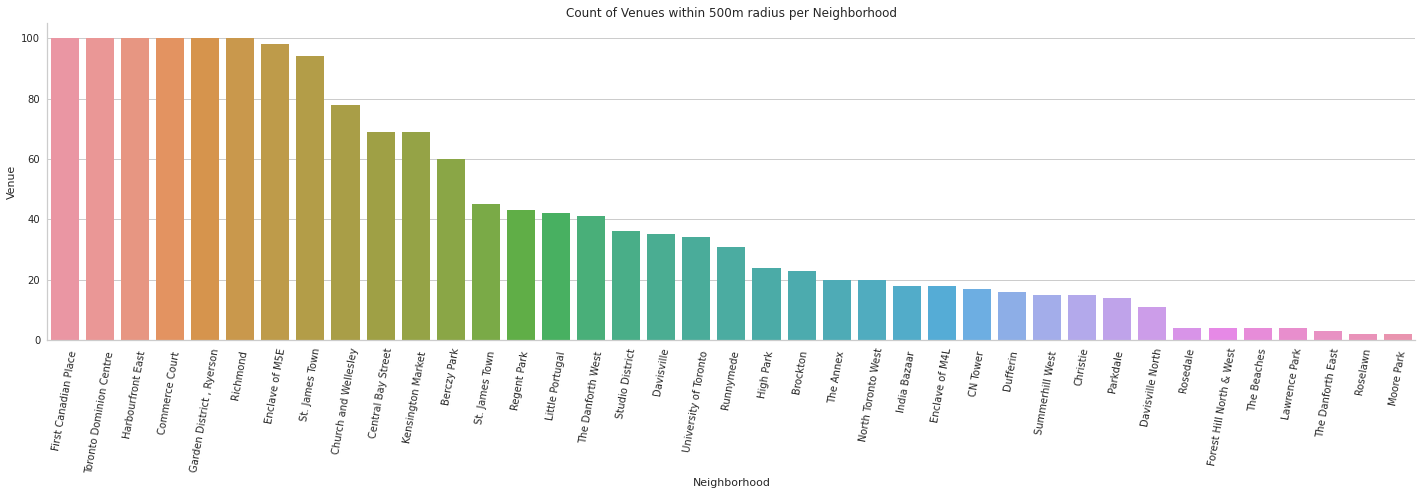

In [47]:
#To view number of venues per neighborhood in Toronto

ven_chart = sns.catplot( data=Venue_count, x='Neighborhood', y='Venue', kind='bar', aspect=4)
ven_chart.set_xticklabels(rotation=80)
ven_chart.set(title='Count of Venues within 500m radius per Neighborhood')

### 2.2: Use one-hot encoding to further categorize the data for analysis

In [48]:
Toronto_onehot = pd.get_dummies(Toronto_df[['Venue Category']], prefix="", prefix_sep="")

Toronto_onehot['Neighborhood'] = Toronto_df['Neighborhood']

fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Toronto_onehot.shape

(1609, 232)

In [50]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.016667,0.000000,0.000000,0.000000,0.000000
1,Brockton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,CN Tower,0.000000,0.000000,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Bay Street,0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.014493,0.000000,0.014493,0.000000,0.000000
4,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.025641,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Commerce Court,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.000000,0.010000
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.028571,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Dufferin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
Toronto_grouped.shape

(39, 232)

### 2.3: Obtain the top venues for each neighborhood

In [52]:
# Top 10 venues

Toronto_top10 = 10

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(Toronto_top10))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1              Bakery  0.05
2        Cocktail Bar  0.05
3            Pharmacy  0.03
4      Farmers Market  0.03
5            Beer Bar  0.03
6         Cheese Shop  0.03
7  Seafood Restaurant  0.03
8          Restaurant  0.03
9   Indian Restaurant  0.02


----Brockton ----
                venue  freq
0                Café  0.13
1      Breakfast Spot  0.09
2              Bakery  0.09
3         Coffee Shop  0.09
4          Restaurant  0.04
5           Nightclub  0.04
6             Stadium  0.04
7                 Bar  0.04
8        Climbing Gym  0.04
9  Italian Restaurant  0.04


----CN Tower ----
                 venue  freq
0      Airport Service  0.18
1       Airport Lounge  0.12
2     Airport Terminal  0.12
3             Boutique  0.06
4  Rental Car Location  0.06
5                Plane  0.06
6        Boat or Ferry  0.06
7     Sculpture Garden  0.06
8                  Bar  0.06
9          Coffee Shop  0.06


---

##### Put the top 10 venues into a dataframe

In [53]:
def return_most_common_venues(row, Toronto_top10):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:Toronto_top10]

##### Create the new dataframe and display top 10 venues per neighborhood

In [54]:
Toronto_top10 = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(Toronto_top10):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
Toronto_venues_sorted = pd.DataFrame(columns=columns)
Toronto_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    Toronto_venues_sorted.iloc[ind,1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], Toronto_top10)
    
Toronto_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Bakery,Cocktail Bar,Pharmacy,Farmers Market,Beer Bar,Cheese Shop,Seafood Restaurant,Restaurant,Indian Restaurant
1,Brockton,Café,Breakfast Spot,Bakery,Coffee Shop,Restaurant,Nightclub,Stadium,Bar,Climbing Gym,Italian Restaurant
2,CN Tower,Airport Service,Airport Lounge,Airport Terminal,Boutique,Rental Car Location,Plane,Boat or Ferry,Sculpture Garden,Bar,Coffee Shop
3,Central Bay Street,Coffee Shop,Café,Sandwich Place,Bank,Italian Restaurant,Restaurant,Salad Place,Japanese Restaurant,Dessert Shop,Department Store
4,Christie,Grocery Store,Café,Park,Italian Restaurant,Baby Store,Candy Store,Restaurant,Coffee Shop,Nightclub,Monument / Landmark


### 2.4: Cluster the Neighborhoods

#### 2.4.1: Run the k-Means algorithm to build a clustering model with a different number of clusters (k)
The features will be the mean of the frequency of occurrence of each venue category. Using Silhouette Score Elbow, we can determine the optimal number of clusters (k) to be used.

The package to be used to run the algorithm are **"from sklearn.cluster import KMeans"** and **"from yellowbrick.cluster import KElbowVisualizer"**

These have already been has already been installed in part 1 of the analysis. 

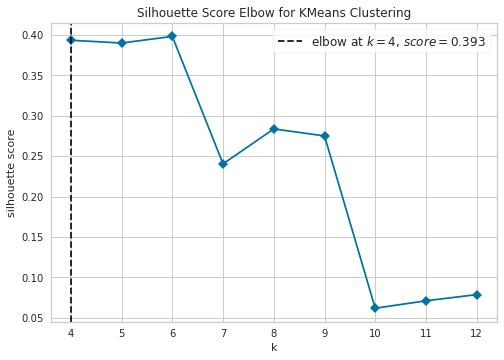

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [55]:
kclusters = (4,13)

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=kclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(Toronto_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()                                  # Finalize and render the figure

Elbow is at K = 4. Therefore, the best number of clusters for this study will be 4 neighborhood clusters

In [56]:
# Run Kmeans clustering
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2], dtype=int32)

#### 2.4.2: Create a new df that includes the cluster and Top 10 for each neighborhood

In [57]:
#add clustering labels

#Toronto_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_venues_sorted['Cluster Labels'] = pd.Series(kmeans.labels_)
TB_merged = boroughs_df

#merge TB_merged with toronto to add geospatial info

TB_merged = TB_merged.join(Toronto_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

TB_merged.head()


,Postcode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,Coffee Shop,Café,Bakery,Pub,Park,Theater,Yoga Studio,Farmers Market,Chocolate Shop,Dessert Shop,2
9,M5B,Downtown Toronto,"Garden District , Ryerson",43.657162,-79.378937,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Japanese Restaurant,Café,Bubble Tea Shop,Cosmetics Shop,Theater,Plaza,Diner,2
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Coffee Shop,Café,Restaurant,Italian Restaurant,Clothing Store,Cocktail Bar,Cosmetics Shop,Department Store,Seafood Restaurant,Farmers Market,2
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,Health Food Store,Trail,Pub,Yoga Studio,Music Venue,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,1
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,Coffee Shop,Bakery,Cocktail Bar,Pharmacy,Farmers Market,Beer Bar,Cheese Shop,Seafood Restaurant,Restaurant,Indian Restaurant,2


#### Re-order the columns to bring the cluster labels to the 4th column

In [58]:
columns = [column for column in TB_merged.columns if column.endswith('Venue')]
columns = ['Borough', 'Neighborhood', 'Cluster Labels'] + columns
print(TB_merged.shape)
TB_merged[columns]

(39, 16)


,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,Regent Park,2,Coffee Shop,Café,Bakery,Pub,Park,Theater,Yoga Studio,Farmers Market,Chocolate Shop,Dessert Shop
9,Downtown Toronto,"Garden District , Ryerson",2,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Japanese Restaurant,Café,Bubble Tea Shop,Cosmetics Shop,Theater,Plaza,Diner
15,Downtown Toronto,St. James Town,2,Coffee Shop,Café,Restaurant,Italian Restaurant,Clothing Store,Cocktail Bar,Cosmetics Shop,Department Store,Seafood Restaurant,Farmers Market
19,East Toronto,The Beaches,1,Health Food Store,Trail,Pub,Yoga Studio,Music Venue,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
20,Downtown Toronto,Berczy Park,2,Coffee Shop,Bakery,Cocktail Bar,Pharmacy,Farmers Market,Beer Bar,Cheese Shop,Seafood Restaurant,Restaurant,Indian Restaurant
24,Downtown Toronto,Central Bay Street,2,Coffee Shop,Café,Sandwich Place,Bank,Italian Restaurant,Restaurant,Salad Place,Japanese Restaurant,Dessert Shop,Department Store
25,Downtown Toronto,Christie,2,Grocery Store,Café,Park,Italian Restaurant,Baby Store,Candy Store,Restaurant,Coffee Shop,Nightclub,Monument / Landmark
30,Downtown Toronto,Richmond,2,Coffee Shop,Café,Hotel,Gym,Restaurant,Vegetarian / Vegan Restaurant,Bar,Clothing Store,Thai Restaurant,Steakhouse
31,West Toronto,Dufferin,2,Pharmacy,Bakery,Pet Store,Park,Music Venue,Café,Fast Food Restaurant,Middle Eastern Restaurant,Brewery,Supermarket
35,East York East Toronto,The Danforth East,0,Park,Convenience Store,Yoga Studio,Music Venue,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant


#### 2.4.3: Visualise the clusters on map

In [59]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

#set colors scheme for clusters
x = np.arange(kclusters)
ys = [i + x +(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers
markers_colors = []
for lat, lon, poi, cluster in zip(TB_merged['Latitude'], TB_merged['Longitude'], TB_merged['Neighborhood'], TB_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker([
        lat, lon],
        radius=5, 
        popup=label, 
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters



### 2.5: Examine the Clusters Closely

### 2.5.1: First Cluster

In [60]:
Cluster_0 = TB_merged.loc[TB_merged['Cluster Labels'] == 0, TB_merged.columns[[2] + list(range(5, TB_merged.shape[1]))]]
print(Cluster_0.shape)
Cluster_0

(3, 12)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
35,The Danforth East,Park,Convenience Store,Yoga Studio,Music Venue,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,0
83,Moore Park,Park,Restaurant,Yoga Studio,Music Venue,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,0
91,Rosedale,Park,Playground,Trail,Yoga Studio,Music Venue,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,0


### 2.5.2: Second Cluster

In [61]:
Cluster_1 = TB_merged.loc[TB_merged['Cluster Labels'] == 1, TB_merged.columns[[2] + list(range(5, TB_merged.shape[1]))]]
print(Cluster_1.shape)
Cluster_1

(2, 12)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
19,The Beaches,Health Food Store,Trail,Pub,Yoga Studio,Music Venue,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,1
68,Forest Hill North & West,Mexican Restaurant,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio,Museum,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,1


#### Find the Top 3 Most Common Venues

### 2.5.3: Third Cluster

In [62]:
Cluster_2 = TB_merged.loc[TB_merged['Cluster Labels'] == 2, TB_merged.columns[[2] + list(range(5, TB_merged.shape[1]))]]
print(Cluster_2.shape)
Cluster_2

(33, 12)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
2,Regent Park,Coffee Shop,Café,Bakery,Pub,Park,Theater,Yoga Studio,Farmers Market,Chocolate Shop,Dessert Shop,2
9,"Garden District , Ryerson",Coffee Shop,Clothing Store,Middle Eastern Restaurant,Japanese Restaurant,Café,Bubble Tea Shop,Cosmetics Shop,Theater,Plaza,Diner,2
15,St. James Town,Coffee Shop,Café,Restaurant,Italian Restaurant,Clothing Store,Cocktail Bar,Cosmetics Shop,Department Store,Seafood Restaurant,Farmers Market,2
20,Berczy Park,Coffee Shop,Bakery,Cocktail Bar,Pharmacy,Farmers Market,Beer Bar,Cheese Shop,Seafood Restaurant,Restaurant,Indian Restaurant,2
24,Central Bay Street,Coffee Shop,Café,Sandwich Place,Bank,Italian Restaurant,Restaurant,Salad Place,Japanese Restaurant,Dessert Shop,Department Store,2
25,Christie,Grocery Store,Café,Park,Italian Restaurant,Baby Store,Candy Store,Restaurant,Coffee Shop,Nightclub,Monument / Landmark,2
30,Richmond,Coffee Shop,Café,Hotel,Gym,Restaurant,Vegetarian / Vegan Restaurant,Bar,Clothing Store,Thai Restaurant,Steakhouse,2
31,Dufferin,Pharmacy,Bakery,Pet Store,Park,Music Venue,Café,Fast Food Restaurant,Middle Eastern Restaurant,Brewery,Supermarket,2
36,Harbourfront East,Coffee Shop,Aquarium,Café,Hotel,Sporting Goods Shop,Scenic Lookout,Restaurant,Brewery,Fried Chicken Joint,Music Venue,2
37,Little Portugal,Bar,Asian Restaurant,Pizza Place,Coffee Shop,Men's Store,Café,Restaurant,Vietnamese Restaurant,Record Shop,Cocktail Bar,2


In [63]:
# First common cluster
first_common = Cluster_2.iloc[:,0:2].groupby('1st Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
first_common.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
first_common

,Venue,Neighborhood
0,Coffee Shop,15
1,Café,4
2,Park,2
3,Sandwich Place,2
4,Airport Service,1
5,Bar,1
6,Breakfast Spot,1
7,Clothing Store,1
8,Greek Restaurant,1
9,Grocery Store,1


In [64]:
# Second common cluster
second_common = Cluster_2[['Neighborhood','2nd Most Common Venue']].groupby('2nd Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
second_common.rename(columns={'2nd Most Common Venue':'Venue'}, inplace=True)
second_common

,Venue,Neighborhood
0,Café,9
1,Bakery,2
2,Pet Store,2
3,Coffee Shop,2
4,Airport Lounge,1
5,Gym / Fitness Center,1
6,Pub,1
7,Liquor Store,1
8,Jewelry Store,1
9,Japanese Restaurant,1


In [65]:
# Third common cluster
third_common = Cluster_2[['Neighborhood','3rd Most Common Venue']].groupby('3rd Most Common Venue').count().sort_values(by='Neighborhood', ascending=False).reset_index()
third_common.rename(columns={'3rd Most Common Venue':'Venue'}, inplace=True)
third_common

,Venue,Neighborhood
0,Café,3
1,Bakery,3
2,Pub,2
3,Coffee Shop,2
4,Hotel,2
5,Italian Restaurant,2
6,Restaurant,2
7,Airport Terminal,1
8,Vegetarian / Vegan Restaurant,1
9,Thai Restaurant,1


In [66]:
# Top 3 common Venues
Cluster_2_top3 = pd.concat([first_common, second_common, third_common])
Cluster_2_top3 = Cluster_2_top3.groupby(by='Venue').sum().sort_values(by='Neighborhood', ascending=False)
print(Cluster_2_top3.shape)
Cluster_2_top3

(44, 1)


,Neighborhood
Venue,
Coffee Shop,19
Café,16
Bakery,5
Hotel,4
Italian Restaurant,3
Park,3
Pet Store,3
Pub,3
Sandwich Place,3


#### Visualise the Top 3 most common venues in Cluster 2 on a pie chart

In [67]:
import matplotlib.pyplot as plt

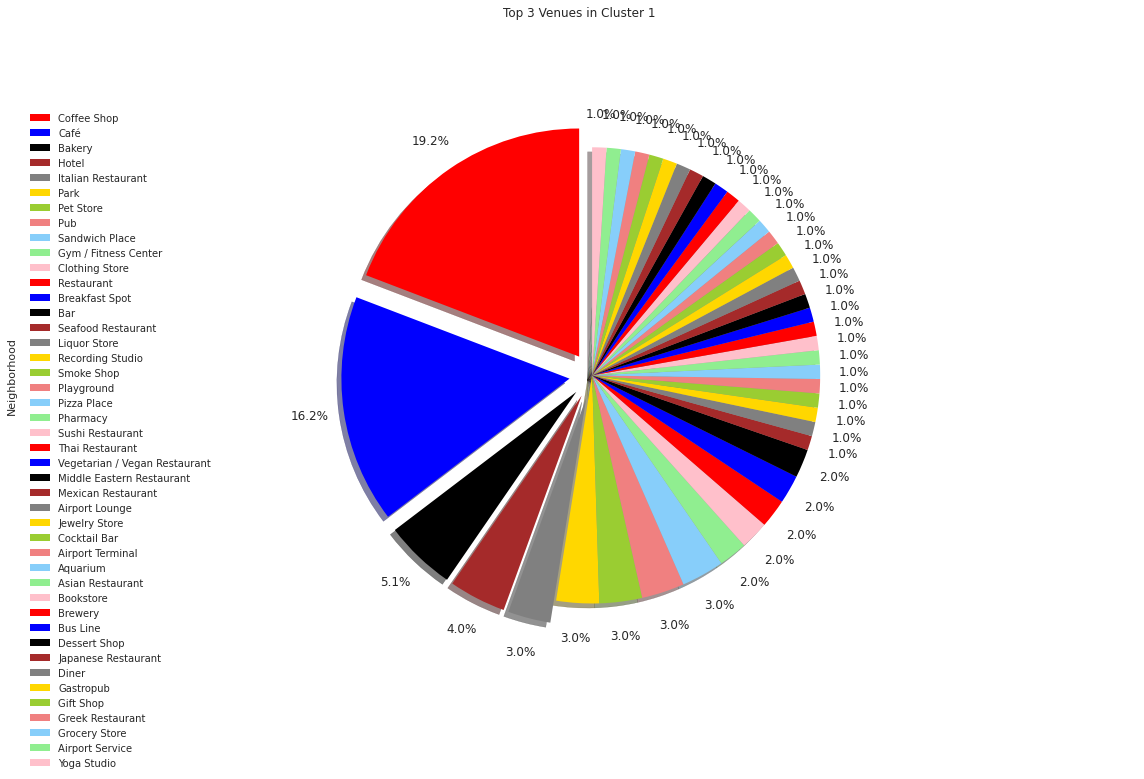

In [68]:
colors_list = ['red', 'blue', 'black', 'brown', 'grey', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# ratio for each venue with which to offset each wedge.
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Cluster_2_top3['Neighborhood'].plot(kind='pie',
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None, # to turn off labels on pie chart
                            pctdistance=1.15, # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# Scale-up the title to 15% to match pctdistance
plt.title('Top 3 Venues in Cluster 1', y=1.15, loc='center') 

plt.axis('equal') 

# add legend
plt.legend(labels=Cluster_2_top3.index, loc='upper left') 

plt.show()

### 2.5.4: Fourth Cluster

In [69]:
Cluster_3 = TB_merged.loc[TB_merged['Cluster Labels'] == 3, TB_merged.columns[[2] + list(range(5, TB_merged.shape[1]))]]
print(Cluster_3.shape)
Cluster_3

(1, 12)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
62,Roselawn,Garden,Home Service,New American Restaurant,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,3


#### Clusters 2 and 3 can be merged together for better view and insight

In [70]:
Cluster_0_1_3 = pd.concat([Cluster_0, Cluster_1, Cluster_3]).reset_index()
column = [column for column in Cluster_0_1_3.columns if column.endswith('Venue')]
Cluster_0_1_3[['Cluster Labels','Neighborhood']+ column].iloc[:,0:7].set_index('Cluster Labels')

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,
0,The Danforth East,Park,Convenience Store,Yoga Studio,Music Venue,Mediterranean Restaurant
0,Moore Park,Park,Restaurant,Yoga Studio,Music Venue,Mediterranean Restaurant
0,Rosedale,Park,Playground,Trail,Yoga Studio,Music Venue
1,The Beaches,Health Food Store,Trail,Pub,Yoga Studio,Music Venue
1,Forest Hill North & West,Mexican Restaurant,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio
3,Roselawn,Garden,Home Service,New American Restaurant,Mediterranean Restaurant,Men's Store


# 4: Results and Discussion

An examination of the clusters showed the following observations:
    
**Cluster 0:** The first cluster lies on the Eastern part of Toronto and has 3 neighborhoods which boasts of **parks, restaurants and yoga studios**.

**Cluster 1:** The second cluster has 2 neighborhoods - both of which are well-known for their **food and trails**.

**Cluster 2:** The third cluster contains 33 neighborhoods and accounts for 85% of all the neighborhoods under study. This cluster runs from the south of Toronto throuth the central to some parts of the north; and it boasts primarily of **coffee shops, cafes and bakeries**.

**Cluster 3:** The fourth cluster has only one neighborhood located on the North-west of Toronto - close to Downsview airport. This neighborhood is primarily surrounded by gardens.

The objective of this study is to help determine the ideal neighborhood to live in Toronto. The ultimate choice of an individual will vary depending on each one's preference(s).

From the observations above, it is highly likely that people, like me, who enjoy the everyday hustle and bustle of a city - and all the amenities it has to offer - will settle for neighborhoods in the third cluster.

Alternatively, people who are more accustomed to a surburb lifestyle willl rather settle for the peace-and-quiet that the neighborhods in the first, second and fourth clusters have to offer. It is important to note however, that the presence of an airport closeby may discourage settlement in the fourth cluster thereby making the first and second clusters more preferred by the peace-and-quiet dwellers.

# 5: Conclusion

Although, this study only analysed the neighborhoods' amenities; other factors such as crime rates, access to public transit, and volume of vehicular traffic should be considered as well. For example, an individual may be attracted to the city but an additional observation of crime rates and vehicular traffic will help to narrow down and decide on the safest and most peaceful neighborhood to choose to live. Therefore, these other factors which were not analysed in this study, may aslo be considered to help make a more informed decision. 
 

Finding the ideal location to live in a new city can be challenging due to many uncertainties. However, one can use openly-sourced available data to understand the city and its neighborhoods. This can be beneficial - even to city planning authorities, business owners, working professionals and entrepreneurs - to aid decision making.

